<a href="https://colab.research.google.com/github/BEAMMII-19/Project_SE_Salary-Prediction/blob/main/Salary_Prediction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

path = '/content/drive/MyDrive/DataforProject/salary.csv'
data = pd.read_csv(path)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


In [4]:
data.nunique() #Checking Unique values

,0
age,73
workclass,9
fnlwgt,21648
education,16
education-num,16
marital-status,7
occupation,15
relationship,6
race,5
sex,2


In [5]:
data.isnull().sum() #Check null values

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [6]:
print(data['salary'].unique())

[' <=50K' ' >50K']


In [7]:
data['salary']

,salary
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
32556,<=50K
32557,>50K
32558,<=50K
32559,<=50K


# กรองเอาเฉพาะ SE ASIAN

In [99]:
se_asia_countries = [' Thailand', ' Vietnam', ' Laos', ' Philippines',' Cambodia']
data_se_asia = data[data['native-country'].isin(se_asia_countries)]

In [100]:
list(data_se_asia.columns)

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'salary']

In [102]:
print(data_se_asia['native-country'].unique())

[' Philippines' ' Cambodia' ' Thailand' ' Laos' ' Vietnam']


In [90]:
#data_se_asia = data[data['native-country'].isin(se_asia_countries)]

In [103]:
# 1️⃣ แปลงตัวแปร binary

data_se_asia.loc[:, 'sex'] = data_se_asia['sex'].astype(str).str.strip().str.title()
data_se_asia.loc[:, 'sex'] = data_se_asia['sex'].map({'Male':1, 'Female':0})

data_se_asia.loc[:, 'salary'] = data_se_asia['salary'].astype(str).str.strip().str.title()
data_se_asia.loc[:, 'salary'] = data_se_asia['salary'].map({'>50K':1, '<=50K':0})


In [104]:
data_se_asia['salary']

,salary
152,0
255,1
265,1
304,0
434,0
...,...
32129,1
32199,1
32203,1
32370,1


In [105]:
data_se_asia['sex']

,sex
152,0
255,1
265,1
304,0
434,1
...,...
32129,1
32199,1
32203,1
32370,1


In [266]:
data_se_asia

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
152,33,Private,163003,Bachelors,13,Never-married,Exec-managerial,Other-relative,Asian-Pac-Islander,0,0,0,40,Philippines,0
255,42,Self-emp-not-inc,303044,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Asian-Pac-Islander,1,0,0,40,Cambodia,1
265,37,Self-emp-inc,257295,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,1,0,0,75,Thailand,1
304,24,Private,303296,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,0,0,0,40,Laos,0
434,27,Private,116358,Some-college,10,Never-married,Craft-repair,Own-child,Asian-Pac-Islander,1,0,1980,40,Philippines,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32129,48,Private,350440,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,1,0,0,40,Cambodia,1
32199,27,Private,100669,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,1,0,0,40,Philippines,1
32203,51,Federal-gov,223206,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,1,15024,0,40,Vietnam,1
32370,53,Self-emp-not-inc,137547,Prof-school,15,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,1,27828,0,40,Philippines,1


In [107]:
print(data_se_asia[data_se_asia['sex'].isna()])
print(data_se_asia[data_se_asia['salary'].isna()])
# Map checking


Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, salary]
Index: []
Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, salary]
Index: []


In [108]:
data_se_asia.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32129,48,Private,350440,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,1,0,0,40,Cambodia,1
32199,27,Private,100669,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,1,0,0,40,Philippines,1
32203,51,Federal-gov,223206,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,1,15024,0,40,Vietnam,1
32370,53,Self-emp-not-inc,137547,Prof-school,15,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,1,27828,0,40,Philippines,1
32428,39,Federal-gov,110622,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,0,0,0,40,Philippines,0


# ทำ PCA เพื่อลดมิติข้อมูล
preprocess คือ (categorical -> 0/1, continuous -> scaled)

เอเชียตะวันออกเฉียงใต้ (Southeast Asia)




In [60]:
# กำหนดรายชื่อประเทศ SE Asia
#se_asia_countries = [' Thailand', ' Vietnam', ' Laos', ' Philippines',' Cambodia']

# กรอง DataFrame
#data_se_asia = data[data['native-country'].isin(se_asia_countries)]

# ตรวจสอบผล
#print(data_se_asia['native-country'].unique())
#print(data_se_asia.head())
# Already done previously

[' Philippines' ' Cambodia' ' Thailand' ' Laos' ' Vietnam']
     age          workclass  fnlwgt      education  education-num  \
152   33            Private  163003      Bachelors             13   
255   42   Self-emp-not-inc  303044        HS-grad              9   
265   37       Self-emp-inc  257295   Some-college             10   
304   24            Private  303296   Some-college             10   
434   27            Private  116358   Some-college             10   

          marital-status        occupation     relationship  \
152        Never-married   Exec-managerial   Other-relative   
255   Married-civ-spouse   Farming-fishing          Husband   
265   Married-civ-spouse   Exec-managerial          Husband   
304   Married-civ-spouse      Adm-clerical             Wife   
434        Never-married      Craft-repair        Own-child   

                    race      sex  capital-gain  capital-loss  hours-per-week  \
152   Asian-Pac-Islander   Female             0             0    

In [10]:
# @title
# กำหนดรายชื่อประเทศ SE Asia
Laos = [' Laos']

# กรอง DataFrame
Laos = data[data['native-country'].isin(Laos)]

# ตรวจสอบผล
print(Laos['native-country'].unique())
print(Laos.head())

[' Laos']
       age workclass  fnlwgt      education  education-num  \
304     24   Private  303296   Some-college             10   
4610    30   Private  350979        HS-grad              9   
5971    53   Private   97411        5th-6th              3   
6853    36   Private  228157   Some-college             10   
15310   19         ?  109938           11th              7   

            marital-status          occupation    relationship  \
304     Married-civ-spouse        Adm-clerical            Wife   
4610    Married-civ-spouse        Craft-repair         Husband   
5971    Married-civ-spouse   Machine-op-inspct         Husband   
6853         Never-married        Craft-repair   Not-in-family   
15310   Married-civ-spouse                   ?            Wife   

                      race      sex  capital-gain  capital-loss  \
304     Asian-Pac-Islander   Female             0             0   
4610    Asian-Pac-Islander     Male             0             0   
5971    Asian-Pac-I

In [109]:
data_se_asia.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


In [110]:
print(data_se_asia['native-country'].value_counts())

native-country
Philippines    198
Vietnam         67
Cambodia        19
Thailand        18
Laos            18
Name: count, dtype: int64


## Dummy

In [111]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

categorical_cols = ['workclass','education','marital-status','occupation',
                    'relationship','race','sex','native-country']

continuous_cols = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
data_encoded = pd.get_dummies(data_se_asia, columns=categorical_cols, drop_first= False)


## Standardized

In [112]:
scaler = StandardScaler()
data_encoded[continuous_cols] = scaler.fit_transform(data_encoded[continuous_cols])
#X_scaled = scaler.fit_transform(data_encoded[continuous_cols])


In [113]:
print(data_encoded.head())
print(data_encoded.shape)  # จะเห็นจำนวน column หลัง one-hot encoding , 1 colunm : 1 Dummy category ,That's why we obtain too many column.


          age    fnlwgt  education-num  capital-gain  capital-loss  \
152 -0.363856 -0.085578       0.867024     -0.137746     -0.220111   
255  0.332890  1.477612      -0.449454     -0.137746     -0.220111   
265 -0.054191  0.966945      -0.120334     -0.137746     -0.220111   
304 -1.060602  1.480425      -0.120334     -0.137746     -0.220111   
434 -0.828354 -0.606247      -0.120334     -0.137746      4.602234   

     hours-per-week salary  workclass_ ?  workclass_ Federal-gov  \
152        0.038178      0         False                   False   
255        0.038178      1         False                   False   
265        3.159310      1         False                   False   
304        0.038178      0         False                   False   
434        0.038178      0         False                   False   

     workclass_ Local-gov  ...  race_ Asian-Pac-Islander  race_ Black  \
152                 False  ...                      True        False   
255                 Fals

In [115]:
print(data_encoded.columns.tolist())


['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'salary', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handle

In [116]:
print(data_encoded.head())
print(data_encoded.shape)
print(data_encoded.dtypes)


          age    fnlwgt  education-num  capital-gain  capital-loss  \
152 -0.363856 -0.085578       0.867024     -0.137746     -0.220111   
255  0.332890  1.477612      -0.449454     -0.137746     -0.220111   
265 -0.054191  0.966945      -0.120334     -0.137746     -0.220111   
304 -1.060602  1.480425      -0.120334     -0.137746     -0.220111   
434 -0.828354 -0.606247      -0.120334     -0.137746      4.602234   

     hours-per-week salary  workclass_ ?  workclass_ Federal-gov  \
152        0.038178      0         False                   False   
255        0.038178      1         False                   False   
265        3.159310      1         False                   False   
304        0.038178      0         False                   False   
434        0.038178      0         False                   False   

     workclass_ Local-gov  ...  race_ Asian-Pac-Islander  race_ Black  \
152                 False  ...                      True        False   
255                 Fals

In [117]:
data_encoded.head()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,race_ Asian-Pac-Islander,race_ Black,race_ White,sex_0,sex_1,native-country_ Cambodia,native-country_ Laos,native-country_ Philippines,native-country_ Thailand,native-country_ Vietnam
152,-0.363856,-0.085578,0.867024,-0.137746,-0.220111,0.038178,0,False,False,False,...,True,False,False,True,False,False,False,True,False,False
255,0.332890,1.477612,-0.449454,-0.137746,-0.220111,0.038178,1,False,False,False,...,True,False,False,False,True,True,False,False,False,False
265,-0.054191,0.966945,-0.120334,-0.137746,-0.220111,3.159310,1,False,False,False,...,True,False,False,False,True,False,False,False,True,False
304,-1.060602,1.480425,-0.120334,-0.137746,-0.220111,0.038178,0,False,False,False,...,True,False,False,True,False,False,True,False,False,False
434,-0.828354,-0.606247,-0.120334,-0.137746,4.602234,0.038178,0,False,False,False,...,True,False,False,False,True,False,False,True,False,False


# PCA

In [175]:
X = data_encoded.drop('salary', axis=1)   # แยกเอาแค่ตัวแปรอิสระ by Deleting the class
y = data_encoded['salary']                # ตัวแปรที่ต้องการทำนาย (optional)


## #data_encoded is a dataframe only have their attributes.


In [176]:
from sklearn.decomposition import PCA

# กำหนดจำนวน components ที่ต้องการ เช่น 0.95 เพื่อเก็บข้อมูล 95% ของความแปรปรวน
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)



In [177]:
eigenvalues = pca.explained_variance_
print("Eigenvalues:", eigenvalues)

Eigenvalues: [1.62013777 1.20858773 1.05702803 0.98457843 0.92435951 0.86129373
 0.54495515 0.34258145 0.31986268 0.24691898 0.20254535 0.18615328
 0.16811108 0.15522842 0.1382869  0.12622559 0.11891734 0.10485244
 0.09983214 0.094102   0.08512256 0.08261749 0.07431117 0.07054723
 0.0661525  0.06181043 0.05815699 0.05340018 0.04796151]


In [178]:
explained_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_ratio)
print("Total explained variance:", sum(explained_ratio))
# เลือก 95%

Explained variance ratio: [0.15235488 0.11365345 0.09940104 0.09258801 0.08692513 0.08099454
 0.05124662 0.03221575 0.03007932 0.02321982 0.01904701 0.01750552
 0.01580887 0.01459741 0.01300425 0.01187003 0.01118278 0.00986014
 0.00938804 0.00884919 0.00800477 0.0077692  0.00698809 0.00663414
 0.00622086 0.00581254 0.00546898 0.00502166 0.00451022]
Total explained variance: 0.9502222468056549


In [179]:
n_components = pca.n_components_
print("Number of components selected:", n_components)


Number of components selected: 29


In [180]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Checking

In [120]:
X = data_encoded.values  # แปลง DataFrame เป็น numpy array
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)


In [122]:
# Eigenvalues ของแต่ละ Principal Component
print("Eigenvalues:")
print(pca.explained_variance_)

# Eigenvectors หรือ Loading Matrix
print("\nEigenvectors (principal axes in feature space):")
print(pca.components_)

# สัดส่วนความแปรปรวนที่แต่ละ PC อธิบายได้
print("\nExplained variance ratio:")
print(pca.explained_variance_ratio_)

# สัดส่วนความแปรปรวนสะสม
import numpy as np
print("\nCumulative explained variance:")
print(np.cumsum(pca.explained_variance_ratio_))


Eigenvalues:
[1.66571438 1.20868416 1.05770021 0.98458484 0.92469482 0.861465
 0.556472   0.36186957 0.32025188 0.24703251 0.20324037 0.18770142
 0.17152056 0.15582155 0.14948877 0.12935217 0.11901779 0.11271541
 0.09983457 0.09807293 0.08870376 0.08292795 0.07906535 0.073721
 0.06983557 0.06266954 0.06092614 0.05810497 0.05299253 0.04725662]

Eigenvectors (principal axes in feature space):
[[ 0.4841691   0.19407143  0.4466222  ...  0.08873323 -0.00133287
  -0.0708429 ]
 [ 0.51275718 -0.47714957 -0.50721643 ...  0.0057548  -0.01194454
  -0.00917154]
 [ 0.25959859  0.2910465  -0.25883087 ... -0.0257821  -0.01575147
   0.00654982]
 ...
 [ 0.00992791 -0.02133853 -0.00696987 ...  0.00268066 -0.0104014
  -0.02327064]
 [-0.00902609 -0.00881583  0.04198914 ... -0.08337426 -0.29422903
  -0.02134545]
 [-0.00146786  0.01516033 -0.03755934 ...  0.02139881 -0.22987138
   0.02130386]]

Explained variance ratio:
[0.15396356 0.11171982 0.09776423 0.09100611 0.08547042 0.07962603
 0.05143523 0.0334479

In [191]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [192]:
print(y_train.dtype)
print(y_train.unique())


int64
[0 1]


In [193]:
print(X_train.shape)
print(type(X_train))
print(X_train[:5])


(224, 29)
<class 'numpy.ndarray'>
[[-1.73943283  1.34037669  0.02516791  0.88413285 -0.38469278 -0.35037295
   0.38664183 -0.32437538 -0.92831075 -0.29348376  0.96655769 -0.12265829
  -0.37277759  0.13903173  0.25918051 -0.15028496  0.44998828  0.38923886
   0.02675809 -0.03025865  0.1765349   0.21654063 -0.27021133  0.06564729
   0.33002607 -0.11354534 -0.05775638 -0.09363392 -0.1274039 ]
 [ 0.92479966  0.25660368 -0.06425199 -0.20893648 -0.17388826 -1.01772407
   0.45033473 -0.49050043  0.60017753  0.32707623  0.07317859  0.09723698
   0.30485648  1.16828646  0.06214442 -0.39288848 -0.05567613 -0.09003467
   0.62677065 -0.14370536 -0.752861   -0.18831052  0.03002257 -0.47750711
  -0.10286333  0.33433554  0.07664198 -0.25578764  0.333558  ]
 [-1.02322161  0.93222196 -0.1673726   0.49541485  0.72833468  0.396309
  -0.46807612 -0.90288069 -0.25196663 -0.19235706  0.45486985  0.22782894
  -0.10350131 -0.02374801  0.02266217 -0.54196648 -0.03571696 -0.47290096
  -0.76813015  0.56142326  0

In [202]:
print(y_train.dtype)
print(np.unique(y_train))


object
[0 1]


In [214]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [215]:
# สมมติว่า y คือ label ของคุณ

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=42
)



*หมายความว่า* train_test_split ทำงานถูกต้องแล้ว

สัดส่วน train:test ≈ 224:96 → ประมาณ 70% train / 30% test ตามที่ตั้งค่า test_size=0.3

In [224]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (224, 29)
X_test shape: (96, 29)
y_train shape: (224,)
y_test shape: (96,)


In [217]:
print(y_train[:10])
print(y_train.dtype)
print(y_train.nunique())  # ถ้าเป็น pandas Series


4919     0
22618    0
15403    0
19501    1
32129    1
11354    0
27714    0
7909     0
20825    0
2590     0
Name: salary, dtype: object
object
2


In [218]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [219]:
print(y_train.dtype)


int64


In [220]:
model = LogisticRegression(max_iter=1000)  # max_iter เพิ่มเผื่อ converge ช้า
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [221]:
y_pred = model.predict(X_test)


In [222]:
print(y_pred)

[0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0]


In [223]:
len(y_pred)

96

# Evaluation Model < Confusion Matrix >

In [227]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[65  4]
 [15 12]]


In [228]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8020833333333334


Data imbalance ทำให้ค่า class1 ถูกตรวจจับได้น้อย


In [229]:
from sklearn.metrics import classification_report

# แสดง precision, recall, f1-score ของแต่ละ class
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.81      0.94      0.87        69
           1       0.75      0.44      0.56        27

    accuracy                           0.80        96
   macro avg       0.78      0.69      0.72        96
weighted avg       0.79      0.80      0.78        96



In [127]:
data_encoded['salary']

,salary
152,0
255,1
265,1
304,0
434,0
...,...
32129,1
32199,1
32203,1
32370,1


แปลง  y_train -> int

In [169]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [171]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [[ 1.57329618  0.11946403 -0.92100041  0.539584   -0.6107007   0.51717355]]
Intercept: [-1.57418914]



P(Y=1)>0.5 โมเดลจะทำนายว่า เงินเดือน >50K

P(Y=1)≤0.5 โมเดลจะทำนายว่า เงินเดือน <=50K

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# สมมติว่า X คือ feature matrix (เช่น จาก PCA 6 components)
# และ y คือ target
X_train, X_test, y_train, y_test = train_test_split(X_pca[:, :6], y, test_size=0.2, random_state=42)



ทำนายคลาสเงินเดือนในพื้นที่เอเชียตะวันออกเฉียงใต้ จากปัจจัยต่างๆ ที่ผ่านการทำ PCA เพื่อลด dimention ของข้อมูล

## เลือกจำนวน Component จาก Scree Plot (6 component)

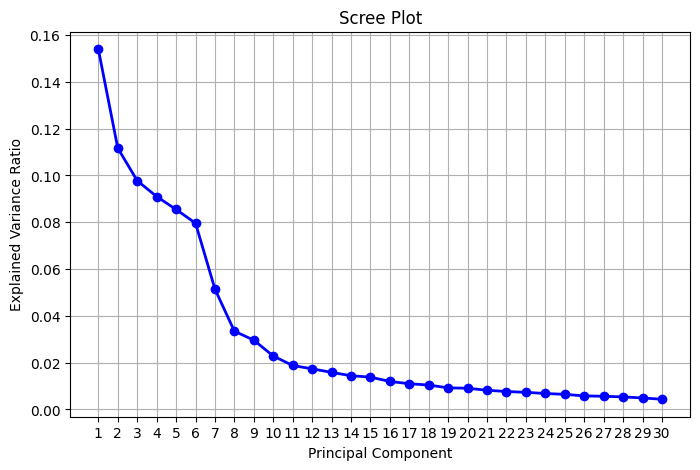

In [123]:

from sklearn.decomposition import PCA

# สมมติว่า pca คือ PCA object ที่ fit แล้ว
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(np.arange(1, len(explained_variance)+1), explained_variance, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance)+1))
plt.grid(True)
plt.show()


In [230]:
#from sklearn.decomposition import PCA

pca6 = PCA(n_components=6)
X_pca6 = pca6.fit_transform(X)


In [243]:
import pandas as pd

# จำลองข้อมูลใหม่ 1 แถว
new_data = pd.DataFrame({
    'age': [35],
    'workclass': ['Private'],
    'fnlwgt': [200000],
    'education': ['Bachelors'],
    'education-num': [13],
    'marital-status': ['Never-married'],
    'occupation': ['Tech-support'],
    'relationship': ['Not-in-family'],
    'race': ['White'],
    'sex': ['Male'],
    'capital-gain': [0],
    'capital-loss': [0],
    'hours-per-week': [40],
    'native-country': [' Thailand']
})

print(new_data)


   age workclass  fnlwgt  education  education-num marital-status  \
0   35   Private  200000  Bachelors             13  Never-married   

     occupation   relationship   race   sex  capital-gain  capital-loss  \
0  Tech-support  Not-in-family  White  Male             0             0   

   hours-per-week native-country  
0              40       Thailand  


In [244]:
# สมมติเราใช้ pd.get_dummies ใน training
new_data_encoded = pd.get_dummies(new_data)

# ทำให้ column ตรงกับ training data
for col in X.columns:
    if col not in new_data_encoded.columns:
        new_data_encoded[col] = 0  # เติม column ที่ขาดด้วย 0

# เรียง column ให้ตรงกับ training data
new_data_encoded = new_data_encoded[X.columns]


In [245]:
new_X_pca = pca6.transform(new_data_encoded)  # ถ้าใช้ 6 components


In [246]:
pred_class = model6.predict(new_X_pca)
pred_proba = model6.predict_proba(new_X_pca)

print("Predicted class:", pred_class)
print("Predicted probability:", pred_proba)


Predicted class: [1]
Predicted probability: [[0. 1.]]


In [247]:


# จำลองข้อมูลใหม่ 1 แถว
new_data = pd.DataFrame({
    'age': [48],
    'workclass': ['Private'],
    'fnlwgt': [350440],
    'education': ['Some-college'],
    'education-num': [10],
    'marital-status': ['Married-civ-spouse'],
    'occupation': ['Craft-repair'],
    'relationship': ['Other-relative'],
    'race': ['Asian-Pac-Islander'],
    'sex': [1],  # สมมติ 1=Male, 0=Female ตามที่เทรน
    'capital-gain': [0],
    'capital-loss': [0],
    'hours-per-week': [40],
    'native-country': ['Cambodia'],
})

print(new_data)


   age workclass  fnlwgt     education  education-num      marital-status  \
0   48   Private  350440  Some-college             10  Married-civ-spouse   

     occupation    relationship                race  sex  capital-gain  \
0  Craft-repair  Other-relative  Asian-Pac-Islander    1             0   

   capital-loss  hours-per-week native-country  
0             0              40       Cambodia  


In [248]:
# แปลง categorical variables
new_data_encoded = pd.get_dummies(new_data)

# เติม column ที่ขาดให้ตรงกับ training data
for col in X.columns:
    if col not in new_data_encoded.columns:
        new_data_encoded[col] = 0

# เรียง column ให้ตรงกับ training data
new_data_encoded = new_data_encoded[X.columns]


In [249]:
new_X_pca = pca6.transform(new_data_encoded)


In [250]:
pred_class = model6.predict(new_X_pca)
pred_proba = model6.predict_proba(new_X_pca)

print("Predicted class:", pred_class)
print("Predicted probability:", pred_proba)


Predicted class: [1]
Predicted probability: [[0. 1.]]


In [251]:

# จำลองข้อมูลใหม่ 1 แถว
new_data = pd.DataFrame({
    'age': [39],
    'workclass': ['Federal-gov'],
    'fnlwgt': [110622],
    'education': ['Bachelors'],
    'education-num': [13],
    'marital-status': ['Married-civ-spouse'],
    'occupation': ['Adm-clerical'],
    'relationship': ['Wife'],
    'race': ['Asian-Pac-Islander'],
    'sex': [0],  # สมมติ 0=Female, 1=Male ตามที่เทรน
    'capital-gain': [0],
    'capital-loss': [0],
    'hours-per-week': [40],
    'native-country': ['Philippines'],
})

print(new_data)



   age    workclass  fnlwgt  education  education-num      marital-status  \
0   39  Federal-gov  110622  Bachelors             13  Married-civ-spouse   

     occupation relationship                race  sex  capital-gain  \
0  Adm-clerical         Wife  Asian-Pac-Islander    0             0   

   capital-loss  hours-per-week native-country  
0             0              40    Philippines  


In [252]:
new_data_encoded = pd.get_dummies(new_data)

# เติม column ที่ขาดให้ตรงกับ training data
for col in X.columns:
    if col not in new_data_encoded.columns:
        new_data_encoded[col] = 0

# เรียง column ให้ตรงกับ training data
new_data_encoded = new_data_encoded[X.columns]


In [256]:
new_X_pca = pca.transform(new_data_encoded)


In [257]:
pred_class = model.predict(new_X_pca)
pred_proba = model.predict_proba(new_X_pca)

print("Predicted class:", pred_class)
print("Predicted probability:", pred_proba)


Predicted class: [0]
Predicted probability: [[1. 0.]]


โมเดลสามารถทำนาย class 0 (<=50K) ได้แม่นกว่า

โมเดล ไม่ค่อยแม่นในการจับคนที่มี class 1 (>50K)

การใช้ 6 PCA components ทำให้ accuracy ยังโอเค (0.78) แต่ recall สำหรับ class 1 ต่ำกว่าเมื่อใช้ 29 components

In [231]:

X_train6, X_test6, y_train6, y_test6 = train_test_split(
    X_pca6, y.astype(int), test_size=0.3, random_state=42
)

model6 = LogisticRegression(max_iter=1000)
model6.fit(X_train6, y_train6)
y_pred6 = model6.predict(X_test6)

print("Results with 6 PCA components:")
print("Accuracy:", accuracy_score(y_test6, y_pred6))
print(classification_report(y_test6, y_pred6))

Results with 6 PCA components:
Accuracy: 0.78125
              precision    recall  f1-score   support

           0       0.79      0.96      0.86        69
           1       0.75      0.33      0.46        27

    accuracy                           0.78        96
   macro avg       0.77      0.64      0.66        96
weighted avg       0.78      0.78      0.75        96



In [258]:

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y.astype(int), test_size=0.3, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Results with 29 PCA components:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Results with 29 PCA components:
Accuracy: 0.8020833333333334
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        69
           1       0.75      0.44      0.56        27

    accuracy                           0.80        96
   macro avg       0.78      0.69      0.72        96
weighted avg       0.79      0.80      0.78        96



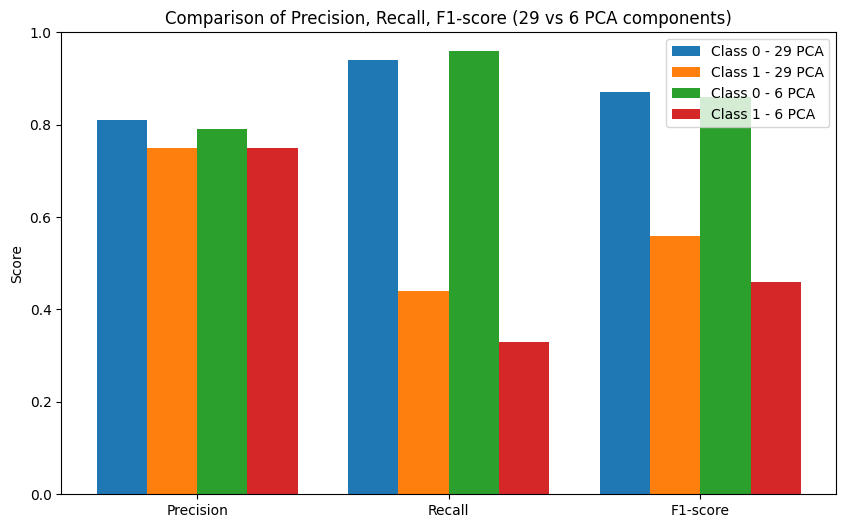

In [264]:


# Metrics สำหรับแต่ละ class
metrics = ['Precision', 'Recall', 'F1-score']
class_0_29 = [0.81, 0.94, 0.87]
class_1_29 = [0.75, 0.44, 0.56]

class_0_6 = [0.79, 0.96, 0.86]
class_1_6 = [0.75, 0.33, 0.46]

x = np.arange(len(metrics))  # index สำหรับ metrics
width = 0.2  # ความกว้างของ bar

fig, ax = plt.subplots(figsize=(10,6))

# plot bars
ax.bar(x - width*1.5, class_0_29, width, label='Class 0 - 29 PCA')
ax.bar(x - width/2, class_1_29, width, label='Class 1 - 29 PCA')
ax.bar(x + width/2, class_0_6, width, label='Class 0 - 6 PCA')
ax.bar(x + width*1.5, class_1_6, width, label='Class 1 - 6 PCA')

# labels and title
ax.set_ylabel('Score')
ax.set_title('Comparison of Precision, Recall, F1-score (29 vs 6 PCA components)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0,1)
ax.legend()

plt.show()




## Class 0 likly have any score more than class 1 because Data is imblance, class 0 larger than the other.

# Resolving : ใช้ metrics ที่ไม่ biased กับ class imbalance

### เช่น ROC-AUC, balanced accuracy, F1-score ของ class 1

# Checking Multicollinearity

In [281]:

# สมมติ df คือ DataFrame ของคุณ (ก่อนแยก label)
X = data_se_asia.drop(columns=['salary'])  # ไม่เอา target
# ถ้าเป็น categorical ให้ทำ one-hot encoding ก่อน
X_encoded = pd.get_dummies(X, drop_first=True)

In [282]:
print(X_encoded.dtypes)

age                                      int64
fnlwgt                                   int64
education-num                            int64
capital-gain                             int64
capital-loss                             int64
hours-per-week                           int64
workclass_ Federal-gov                    bool
workclass_ Local-gov                      bool
workclass_ Private                        bool
workclass_ Self-emp-inc                   bool
workclass_ Self-emp-not-inc               bool
workclass_ State-gov                      bool
workclass_ Without-pay                    bool
education_ 11th                           bool
education_ 12th                           bool
education_ 1st-4th                        bool
education_ 5th-6th                        bool
education_ 7th-8th                        bool
education_ 9th                            bool
education_ Assoc-acdm                     bool
education_ Assoc-voc                      bool
education_ Ba

In [297]:
print(X.dtypes)


age                            float64
fnlwgt                         float64
education-num                  float64
capital-gain                   float64
capital-loss                   float64
                                ...   
native-country_ Cambodia          bool
native-country_ Laos              bool
native-country_ Philippines       bool
native-country_ Thailand          bool
native-country_ Vietnam           bool
Length: 68, dtype: object


In [296]:
# สมมติ df คือ DataFrame ของคุณ (ไม่เอา target)
X = data_encoded.copy()

# แปลง categorical columns เป็น dummy variables
X_encoded = pd.get_dummies(X, drop_first=True)

# ตรวจสอบว่าเป็น numeric ทั้งหมด
print(X_encoded.dtypes)

age                            float64
fnlwgt                         float64
education-num                  float64
capital-gain                   float64
capital-loss                   float64
                                ...   
native-country_ Laos              bool
native-country_ Philippines       bool
native-country_ Thailand          bool
native-country_ Vietnam           bool
salary_1                          bool
Length: 68, dtype: object


ตรวจสอบความสัมพันธ์ระหว่างตัวแปรอิสระ